In [1]:
import pandas as pd 

In [2]:
df_ads = pd.read_csv('florist-WeChat-articles.csv')
df_ads.head(10)

,Likes,Forwards,Hot,Rating,Views
0,2646,1347.0,7,5,260004
1,816,816.0,4,6,100004
2,1224,612.0,6,5,164502
3,1261,1261.0,6,6,163001
4,1720,1720.0,7,5,260401
5,1541,1541.0,7,5,220002
6,827,NaN,5,7,107503
7,866,686.0,5,9,110504
8,1314,1300.0,8,5,229461
9,1431,1099.0,6,5,165004


In [3]:
df_ads.isna().sum()

Likes        0
Forwards    37
Hot          0
Rating       0
Views        0
dtype: int64

In [4]:
df_ads = df_ads.dropna()

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

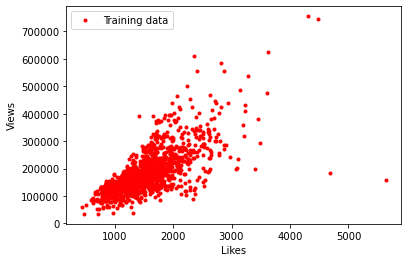

In [6]:
plt.plot(df_ads['Likes'],df_ads['Views'],'r.', label='Training data')
plt.xlabel('Likes')
plt.ylabel('Views')
plt.legend()
plt.show()

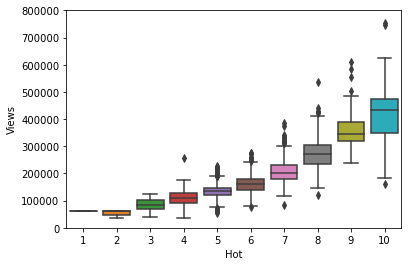

In [7]:
data = pd.concat([df_ads['Views'], df_ads['Hot']], axis=1)
fig = sns.boxplot(x='Hot', y="Views", data=data)
fig.axis(ymin=0, ymax=800000);

In [8]:
X = df_ads.drop(['Views'],axis=1)
y = df_ads.Views

In [9]:
X.head()

,Likes,Forwards,Hot,Rating
0,2646,1347.0,7,5
1,816,816.0,4,6
2,1224,612.0,6,5
3,1261,1261.0,6,6
4,1720,1720.0,7,5


In [10]:
y.head()

0    260004
1    100004
2    164502
3    163001
4    260401
Name: Views, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=0.2, random_state=10)

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

In [15]:
df_ads_pred = X_test.copy()
df_ads_pred['Views True'] = y_test
df_ads_pred['Views Predict'] = y_pred
df_ads_pred

,Likes,Forwards,Hot,Rating,Views True,Views Predict
150,1768,884.0,7,5,224904,204326.495272
36,988,988.0,5,5,113001,117182.827329
1049,2062,1157.0,7,5,277002,236266.050505
393,1392,1392.0,5,6,121502,166316.290479
1255,1537,1319.0,6,9,174002,206254.835807
...,...,...,...,...,...,...
497,1913,896.0,6,6,177004,189916.572692
644,1500,1356.0,7,5,246582,218800.099624
38,1258,1258.0,7,5,172504,200171.838771
943,438,290.0,2,5,60004,-32628.683687


In [16]:
print('Test Score', model.score(X_test, y_test))
print('Train Score', model.score(X_train, y_train))

Test Score 0.418936509530742
Train Score 0.7826168129744089
